# Assignment 7 [PyTorch]

In this assignment, I will implement two datasets using PyTorch and document my observations. 

(1) **digits dataset**. Each digit is an 8x8 image, there are 10 digits (classes) from 0 to 9. About 180 samples per class. How to load digits dataset?

- from sklearn import datasets
- digits = datasets.load_digits()

(2) **Iris Dataset**. This dataset consists of 3 different types of irises (Setosa, Versicolour, and Virginica) petal and sepal length stored in a 150x4 numpy array. How to load Iris Dataset? 

- from sklearn import datasets 
- iris = datasets.load_iris()

Tasks:

* &rarr; Setup PyTorch environment and write/modify the code for each of the above datasets (refer to MNIST example from class). (2 points)
* &rarr; Compare PyTorch run with KNN algorithm (you completed) for a data split of 60-40 (60% train, 40% test). (2 points)
* &rarr; Implement PyTorch for Burn Images problem and comment on your observations. (Extra Credit, 2 points). 
(For this part, you need to figure out how to load new data into PyTorch and converting images into tensors.)

Final Report:

- [x] Do these problems qualify or suitable for deep learning? why or why not? 
- [x] How does Pytorch compare with KNN. Include all differences you can think of!, and 
- [x] How many features are included in each problem (use online resources or study on principle component analysis)

In [1]:
#setting up pytorch env using modules

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets
from torch.utils.data import TensorDataset, DataLoader

In [2]:
#importing sklearn modules

from sklearn import datasets
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
#importing modules of python 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Digits Dataset with KNN

In [4]:
#loading data
digits = datasets.load_digits()

In [5]:
X = digits['data']
y = digits['target']

In [6]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [7]:
#finding best k value using tuning
clf = GridSearchCV(neighbors.KNeighborsClassifier(),{'n_neighbors': list(range(1,10))}, cv=10, return_train_score=False)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [8]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000591,0.000167,0.005283,0.001129,1,{'n_neighbors': 1},0.972222,0.990741,0.972222,0.990741,0.981481,0.990741,1.000000,0.990741,0.981308,0.981308,0.985151,0.008502,1
1,0.000507,0.000018,0.004971,0.000268,2,{'n_neighbors': 2},0.972222,0.972222,0.962963,0.981481,0.962963,0.990741,0.990741,0.990741,0.971963,0.971963,0.976800,0.010376,3
2,0.000519,0.000066,0.005246,0.000217,3,{'n_neighbors': 3},0.962963,0.981481,0.962963,0.990741,0.990741,0.990741,0.990741,0.972222,0.971963,0.990654,0.980521,0.011314,2
3,0.000611,0.000216,0.006811,0.001188,4,{'n_neighbors': 4},0.972222,0.972222,0.962963,0.990741,0.981481,0.981481,0.972222,0.962963,0.971963,0.981308,0.974957,0.008329,4
4,0.000633,0.000045,0.007396,0.000648,5,{'n_neighbors': 5},0.962963,0.972222,0.962963,0.990741,0.981481,0.981481,0.972222,0.962963,0.962617,0.990654,0.974031,0.010821,5
5,0.000796,0.000046,0.009288,0.000532,6,{'n_neighbors': 6},0.962963,0.972222,0.953704,0.990741,0.972222,0.990741,0.972222,0.962963,0.962617,0.962617,0.970301,0.011610,7
6,0.000812,0.000018,0.009401,0.000381,7,{'n_neighbors': 7},0.953704,0.962963,0.953704,0.990741,0.972222,0.990741,0.990741,0.962963,0.962617,0.971963,0.971236,0.014031,6
7,0.000755,0.000064,0.008684,0.000577,8,{'n_neighbors': 8},0.944444,0.962963,0.953704,0.990741,0.981481,1.000000,0.972222,0.962963,0.962617,0.962617,0.969375,0.016093,8
8,0.000663,0.000009,0.007792,0.000199,9,{'n_neighbors': 9},0.944444,0.962963,0.953704,0.981481,0.981481,1.000000,0.972222,0.953704,0.962617,0.971963,0.968458,0.015611,9


In [9]:
#model training
knn_digits = neighbors.KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn_digits

KNeighborsClassifier(n_neighbors=3)

In [10]:
#accuracy
knn_digits.score(X_test, y_test)

0.9888734353268428

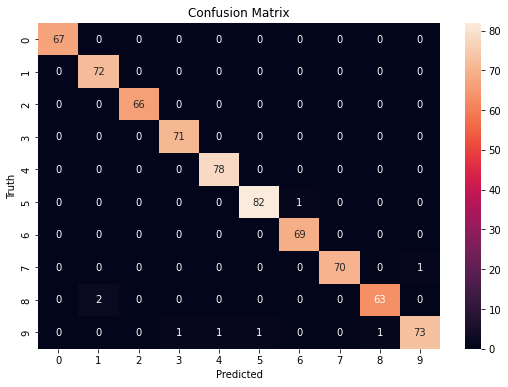

In [11]:
#confusion matrix
y_pred = knn_digits.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")
plt.show()

In [12]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.97      1.00      0.99        72
           2       1.00      1.00      1.00        66
           3       0.99      1.00      0.99        71
           4       0.99      1.00      0.99        78
           5       0.99      0.99      0.99        83
           6       0.99      1.00      0.99        69
           7       1.00      0.99      0.99        71
           8       0.98      0.97      0.98        65
           9       0.99      0.95      0.97        77

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719



# Digits Dataset with Pytorch

In [13]:
X = digits['data']
y = digits['target']

In [14]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [15]:
#converting into tensors
X_train = torch.from_numpy(X_train).to(torch.float32)
X_test = torch.from_numpy(X_test).to(torch.float32)
y_train = torch.from_numpy(y_train).to(torch.long)
y_test = torch.from_numpy(y_test).to(torch.long)

In [16]:
#agumenting tensors
traindata = TensorDataset(X_train, y_train)
testdata = TensorDataset(X_test, y_test)

In [17]:
#loading batches into the network
traindata = torch.utils.data.DataLoader(traindata, batch_size=10, shuffle=True)
testdata = torch.utils.data.DataLoader(testdata, batch_size=10, shuffle=True)

In [18]:
#model training
class NNDigits(nn.Module):
    def __init__ (self):
        super().__init__()
        self.fc1 = nn.Linear(64,32)
        self.fc2 = nn.Linear(32,16)
        self.fc3 = nn.Linear(16,10)
        
    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

nn_digits = NNDigits()
print (nn_digits)

NNDigits(
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=10, bias=True)
)


In [19]:
#optimizing the network
optimizer = optim.Adam(nn_digits.parameters(),lr=0.001)
EPOCHS = 100
for epoch in range(EPOCHS):
    for data in traindata:
        X, y = data
        nn_digits.zero_grad()
        output = nn_digits(X.view(-1,8*8))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(1.1048, grad_fn=<NllLossBackward0>)
tensor(0.5081, grad_fn=<NllLossBackward0>)
tensor(0.3823, grad_fn=<NllLossBackward0>)
tensor(0.0170, grad_fn=<NllLossBackward0>)
tensor(0.6120, grad_fn=<NllLossBackward0>)
tensor(0.1517, grad_fn=<NllLossBackward0>)
tensor(0.1304, grad_fn=<NllLossBackward0>)
tensor(0.0420, grad_fn=<NllLossBackward0>)
tensor(0.0471, grad_fn=<NllLossBackward0>)
tensor(0.0229, grad_fn=<NllLossBackward0>)
tensor(0.0398, grad_fn=<NllLossBackward0>)
tensor(0.0869, grad_fn=<NllLossBackward0>)
tensor(0.0820, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.3393, grad_fn=<NllLossBackward0>)
tensor(0.0330, grad_fn=<NllLossBackward0>)
tensor(0.0045, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0139, grad_fn=<NllLossBackward0>)
tensor(0.0492, grad_fn=<NllLossBackward0>)
tensor(0.0066, grad_fn=<NllLossBackward0>)
tensor(0.0065, grad_fn=<NllLossBackward0>)
tensor(0.0113, grad_fn=<NllLossBackward0>)
tensor(0.00

In [20]:
#accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testdata:
        X, y = data
        output = nn_digits(X.view(-1,8*8))
        for idx, i in enumerate (output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print ("Accuracy of digits dataset with Pytorch: ", round(correct/total, 3)*100)

Accuracy of digits dataset with Pytorch:  97.8


# Iris Dataset using KNN

In [21]:
#loading the data
iris = datasets.load_iris()

In [22]:
X = iris['data']
y = iris['target']

In [23]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [24]:
#finding best k value
clf = GridSearchCV(neighbors.KNeighborsClassifier(),{'n_neighbors': list(range(1,10))}, cv=10, return_train_score=False)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [25]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000474,0.000166,0.000884,0.000111,1,{'n_neighbors': 1},0.888889,1.0,1.000000,0.666667,0.888889,1.0,1.0,1.0,1.0,0.888889,0.933333,0.101835,1
1,0.000393,0.000006,0.000815,0.000018,2,{'n_neighbors': 2},0.777778,1.0,0.888889,0.666667,1.000000,1.0,1.0,1.0,1.0,0.888889,0.922222,0.111665,6
2,0.000388,0.000003,0.000810,0.000037,3,{'n_neighbors': 3},0.888889,1.0,0.888889,0.777778,0.888889,1.0,1.0,1.0,1.0,0.888889,0.933333,0.073703,1
3,0.000387,0.000002,0.000796,0.000007,4,{'n_neighbors': 4},0.777778,1.0,1.000000,0.777778,1.000000,1.0,1.0,1.0,1.0,0.777778,0.933333,0.101835,1
4,0.000387,0.000005,0.000811,0.000032,5,{'n_neighbors': 5},0.777778,1.0,0.888889,0.777778,1.000000,1.0,1.0,1.0,1.0,0.888889,0.933333,0.088889,1
5,0.000386,0.000003,0.000796,0.000004,6,{'n_neighbors': 6},0.777778,1.0,0.888889,0.777778,0.888889,1.0,1.0,1.0,1.0,0.888889,0.922222,0.086781,6
6,0.000387,0.000002,0.000798,0.000005,7,{'n_neighbors': 7},0.777778,1.0,0.888889,0.777778,0.888889,1.0,1.0,1.0,1.0,0.888889,0.922222,0.086781,6
7,0.000384,0.000002,0.000813,0.000035,8,{'n_neighbors': 8},0.777778,1.0,0.888889,0.777778,0.888889,1.0,1.0,1.0,1.0,0.888889,0.922222,0.086781,6
8,0.000389,0.000005,0.000823,0.000060,9,{'n_neighbors': 9},0.777778,1.0,0.888889,0.777778,1.000000,1.0,1.0,1.0,1.0,0.888889,0.933333,0.088889,1


In [26]:
#model training
knn_iris = neighbors.KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn_iris

KNeighborsClassifier(n_neighbors=3)

In [27]:
#accuracy
knn_iris.score(X_test, y_test)

0.9833333333333333

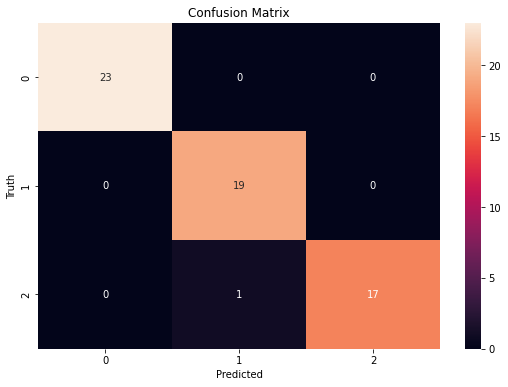

In [28]:
#confusion matrix
y_pred = knn_iris.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")
plt.show()

In [29]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



# Iris Dataset using Pytorch

In [30]:
X = iris['data']
y = iris['target']

In [31]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [32]:
#converting into tensors
X_train = torch.from_numpy(X_train).to(torch.float32)
X_test = torch.from_numpy(X_test).to(torch.float32)
y_train = torch.from_numpy(y_train).to(torch.long)
y_test = torch.from_numpy(y_test).to(torch.long)

In [33]:
#augmenting tensors
traindata = TensorDataset(X_train, y_train)
testdata = TensorDataset(X_test, y_test)

In [34]:
#loading batches into the network
traindata = torch.utils.data.DataLoader(traindata, batch_size=10, shuffle=True)
testdata = torch.utils.data.DataLoader(testdata, batch_size=10, shuffle=True)

In [35]:
#model training
class NNIris(nn.Module):
    def __init__ (self,input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim,50)
        self.fc2 = nn.Linear(50,50)
        self.fc3 = nn.Linear(50,3)
        
    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

nn_iris = NNIris(4)
print (nn_iris)

NNIris(
  (fc1): Linear(in_features=4, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)


In [36]:
#optimizing the network
optimizer = optim.Adam(nn_iris.parameters(),lr=0.001)
lossfn = nn.CrossEntropyLoss()

EPOCHS  = 100
for epoch in range(EPOCHS):
    for data in traindata:
        X,y = data
        output = nn_iris(X)
        loss = lossfn(output, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(loss)

tensor(1.1570, grad_fn=<NllLossBackward0>)
tensor(0.9989, grad_fn=<NllLossBackward0>)
tensor(0.8300, grad_fn=<NllLossBackward0>)
tensor(0.8751, grad_fn=<NllLossBackward0>)
tensor(0.8179, grad_fn=<NllLossBackward0>)
tensor(0.6675, grad_fn=<NllLossBackward0>)
tensor(0.6641, grad_fn=<NllLossBackward0>)
tensor(0.5148, grad_fn=<NllLossBackward0>)
tensor(0.5054, grad_fn=<NllLossBackward0>)
tensor(0.6160, grad_fn=<NllLossBackward0>)
tensor(0.5693, grad_fn=<NllLossBackward0>)
tensor(0.3299, grad_fn=<NllLossBackward0>)
tensor(0.3859, grad_fn=<NllLossBackward0>)
tensor(0.4421, grad_fn=<NllLossBackward0>)
tensor(0.3176, grad_fn=<NllLossBackward0>)
tensor(0.3621, grad_fn=<NllLossBackward0>)
tensor(0.3808, grad_fn=<NllLossBackward0>)
tensor(0.3664, grad_fn=<NllLossBackward0>)
tensor(0.2163, grad_fn=<NllLossBackward0>)
tensor(0.2644, grad_fn=<NllLossBackward0>)
tensor(0.1625, grad_fn=<NllLossBackward0>)
tensor(0.2397, grad_fn=<NllLossBackward0>)
tensor(0.1901, grad_fn=<NllLossBackward0>)
tensor(0.19

In [37]:
#accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testdata:
        X, y = data
        output = nn_iris(X)
        for idx, i in enumerate (output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print ("Accuracy of iris dataset with Pytorch: ", round(correct/total, 3)*100)

Accuracy of iris dataset with Pytorch:  96.7
